## Bayes factor, numerical integration

Numerical integration form of the Bayes factor is,

$$
\begin{align}
\mathcal{B}_U^L = \Bigg[&\\ \nonumber
& \bigg< \\ \nonumber
&\; P(m_1, m_2, \iota, d_{L,1}|T_1, d_1) P(\alpha, \delta | T_1, d_1) \times \\ \nonumber
&\; P(m_1, m_2, \iota, d_{L,2}|T_2, d_2) P(\alpha, \delta | T_2, d_2) \times \\ \nonumber
&\; P_{astro}(m_{1}, m_{2}, \iota, d_{L,1}, d_{L,2}, \Delta T|H_L) P_{astro}(\alpha, \delta | H_L) \div \\ \nonumber
&\; \{P_{comb}(m_1, m_2, \iota, d_{L,1}, d_{L,2}|T_1, d_1, T_2, d_2) P_{comb}(\alpha, \delta | T_1, d_1, T_2, d_2)\} \\ \nonumber
&\bigg>_{ m_1, m_2, \iota, d_{L,1}, d_{L,2} \in P_{comb}(m_1, m_2, \iota, d_{L,1}, d_{L,2}|T_1, d_1, T_2, d_2),\; \alpha, \delta \in P_{comb}(\alpha, \delta | T_1, d_1, T_2, d_2)} \\ \nonumber
& \Bigg] \div \Bigg[\\ \nonumber
& \bigg<\\ \nonumber
&\; P_{astro}(m_{1,1}, m_{2,1}, \iota_1, d_{L,1}|H_U) P(\alpha_1, \delta_1 | H_U) \times \\ \nonumber
&\; P_{astro}(m_{1,2}, m_{2,2}, \iota_2, d_{L,2}|H_U) P_{astro}(\Delta T|H_U) P(\alpha_2, \delta_2 | H_U) \\ \nonumber
&\bigg>_{ m_{1,1}, m_{2,1}, \iota_1, d_{L,1}\in P(m_{1,1}, m_{2,1}, \iota_1, d_{L,1}|T_1, d_1),\; \alpha_1, \delta_1 \in P(\alpha_1, \delta_1 | T_1, d_1),}\\ \nonumber
&_{\; m_{1,2}, m_{2,2}, \iota_2, d_{L,2}\in P(m_{1,2}, m_{2,2}, \iota_2, d_{L,2}|T_2, d_2),\; \alpha_1, \delta_1 \in P(\alpha_2, \delta_2 | T_2, d_2)} \\ \nonumber
\Bigg]& 
\end{align}
$$

## TOC:
1. [$P_{astro}(m_{1}, m_{2}, \iota, d_{L,1}, d_{L,2}, \Delta T|H_L)$](#astro_lensed)
2. [$P_{astro}(\alpha, \delta | H_L)$](#astro_lensed_sky)

In [1]:
import numpy as np
from ler.utils import get_param_from_json, save_json, load_json, load_hdf5
import matplotlib.pyplot as plt
import pobs

Setting multiprocessing start method to 'fork'


In [51]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)

<module 'pobs.modelgenerator_dpgmm' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/modelgenerator_dpgmm.py'>

### $P_{astro}(m_{1}, m_{2}, \iota, d_{L,1}, d_{L,2}, \Delta T|H_L)$ <a class="anchor" id="astro_lensed"></a>


In [19]:
test = pobs.ModelGenerator(
    model_name='astro_lensed',
    model_type='astro_lensed',
    kde_model_type='dpgmm',
    data_dict=None,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)
# time to generate the model: 5m 16.9s

astro_lensed is None
getting default astro_lensed data_dict from pobs module
Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_astro_lensed.pkl 
Saving scaler to ./pobs_data/scaler_path_astro_lensed.pkl
Saving min_max to ./pobs_data/min_max_path_astro_lensed.json
Saving renormalization constant to ./pobs_data/renorm_const_path_astro_lensed.json


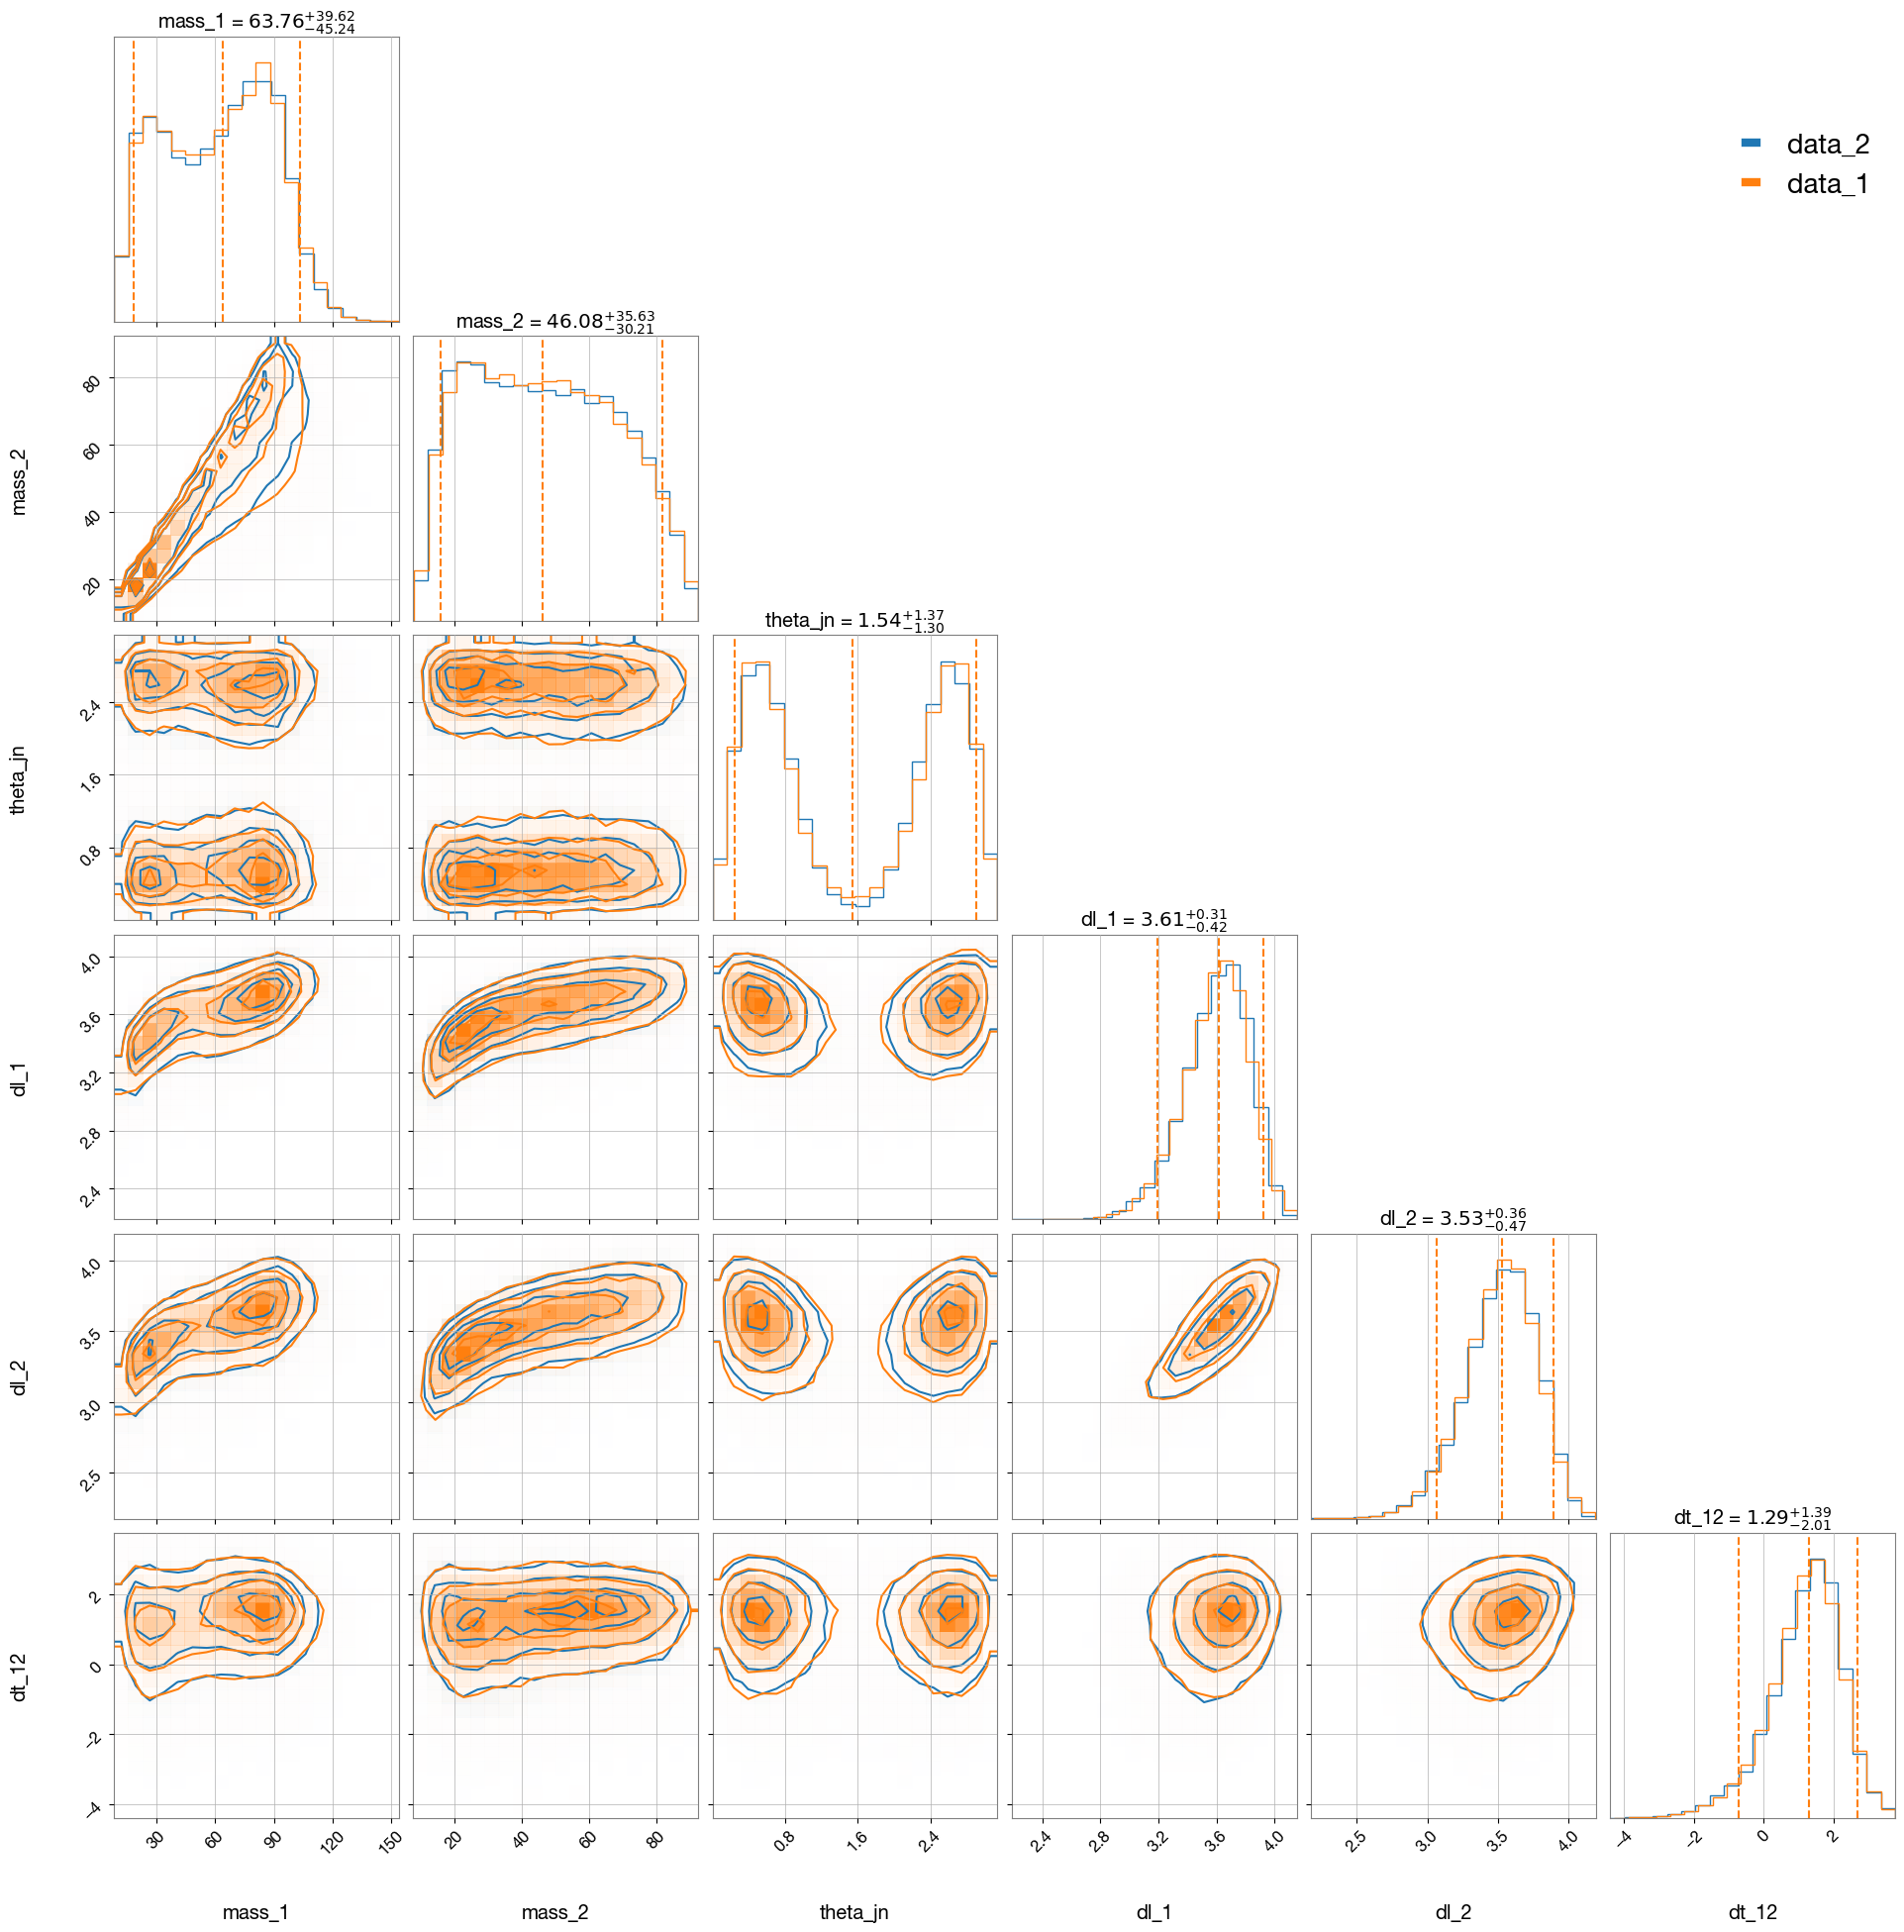

In [20]:
# new data
data_new = test.resample(40000)
data_new_ = data_new.copy()
data_new_['dt_12'] = np.log10(data_new_['dt_12']/86400)
data_new_['dl_1'] = np.log10(data_new_['dl_1'])
data_new_['dl_2'] = np.log10(data_new_['dl_2'])

# original data
data_old_ = pobs.load_data_from_module("pobs", "data", "n_lensed_detectable_bbh_po_spin.json")
data_old_ = pobs.data_check_astro_lensed_dpgmm(data_old_)
data_old_['dt_12'] = np.log10(data_old_['dt_12']/86400)
data_old_['dl_1'] = np.log10(data_old_['dl_1'])
data_old_['dl_2'] = np.log10(data_old_['dl_2'])

pobs.plot(data_dict1=data_new_, data_dict2=data_old_)
plt.show()

min pdf: 3.489367554535501e-09, max pdf: 0.1357550650689937


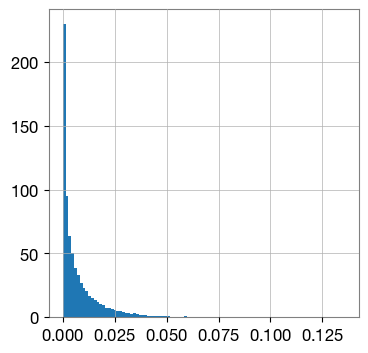

In [23]:
pdf = test.pdf(data_new)
print(f"min pdf: {np.min(pdf)}, max pdf: {np.max(pdf)}")

plt.figure(figsize=(4, 4))
plt.hist(pdf, bins=100, density=True)
plt.show()

### $P_{astro}(\alpha, \delta | H_L)$ <a class="anchor" id="astro_lensed_sky"></a>

In [ ]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)

In [13]:
test = pobs.ModelGenerator(
    model_name='astro_lensed_sky',
    model_type='astro_lensed_sky',
    kde_model_type='dpgmm',
    data_dict=None,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=False,
)

Loading model from ./pobs_data/model_path_astro_lensed_sky.pkl
Loading scaler from ./pobs_data/scaler_path_astro_lensed_sky.pkl
Loading min_max from ./pobs_data/min_max_path_astro_lensed_sky.json
Loading renormalization constant from ./pobs_data/renorm_const_path_astro_lensed_sky.json


In [14]:
# new data
data_new = test.resample(40000)

In [15]:
data_new_ = data_new.copy()

# original data
data_old_ = pobs.load_data_from_module("pobs", "data", "n_lensed_detectable_bbh_po_spin.json")
data_old_ = pobs.data_check_astro_lensed_sky_dpgmm(data_old_)

<Figure size 500x500 with 0 Axes>

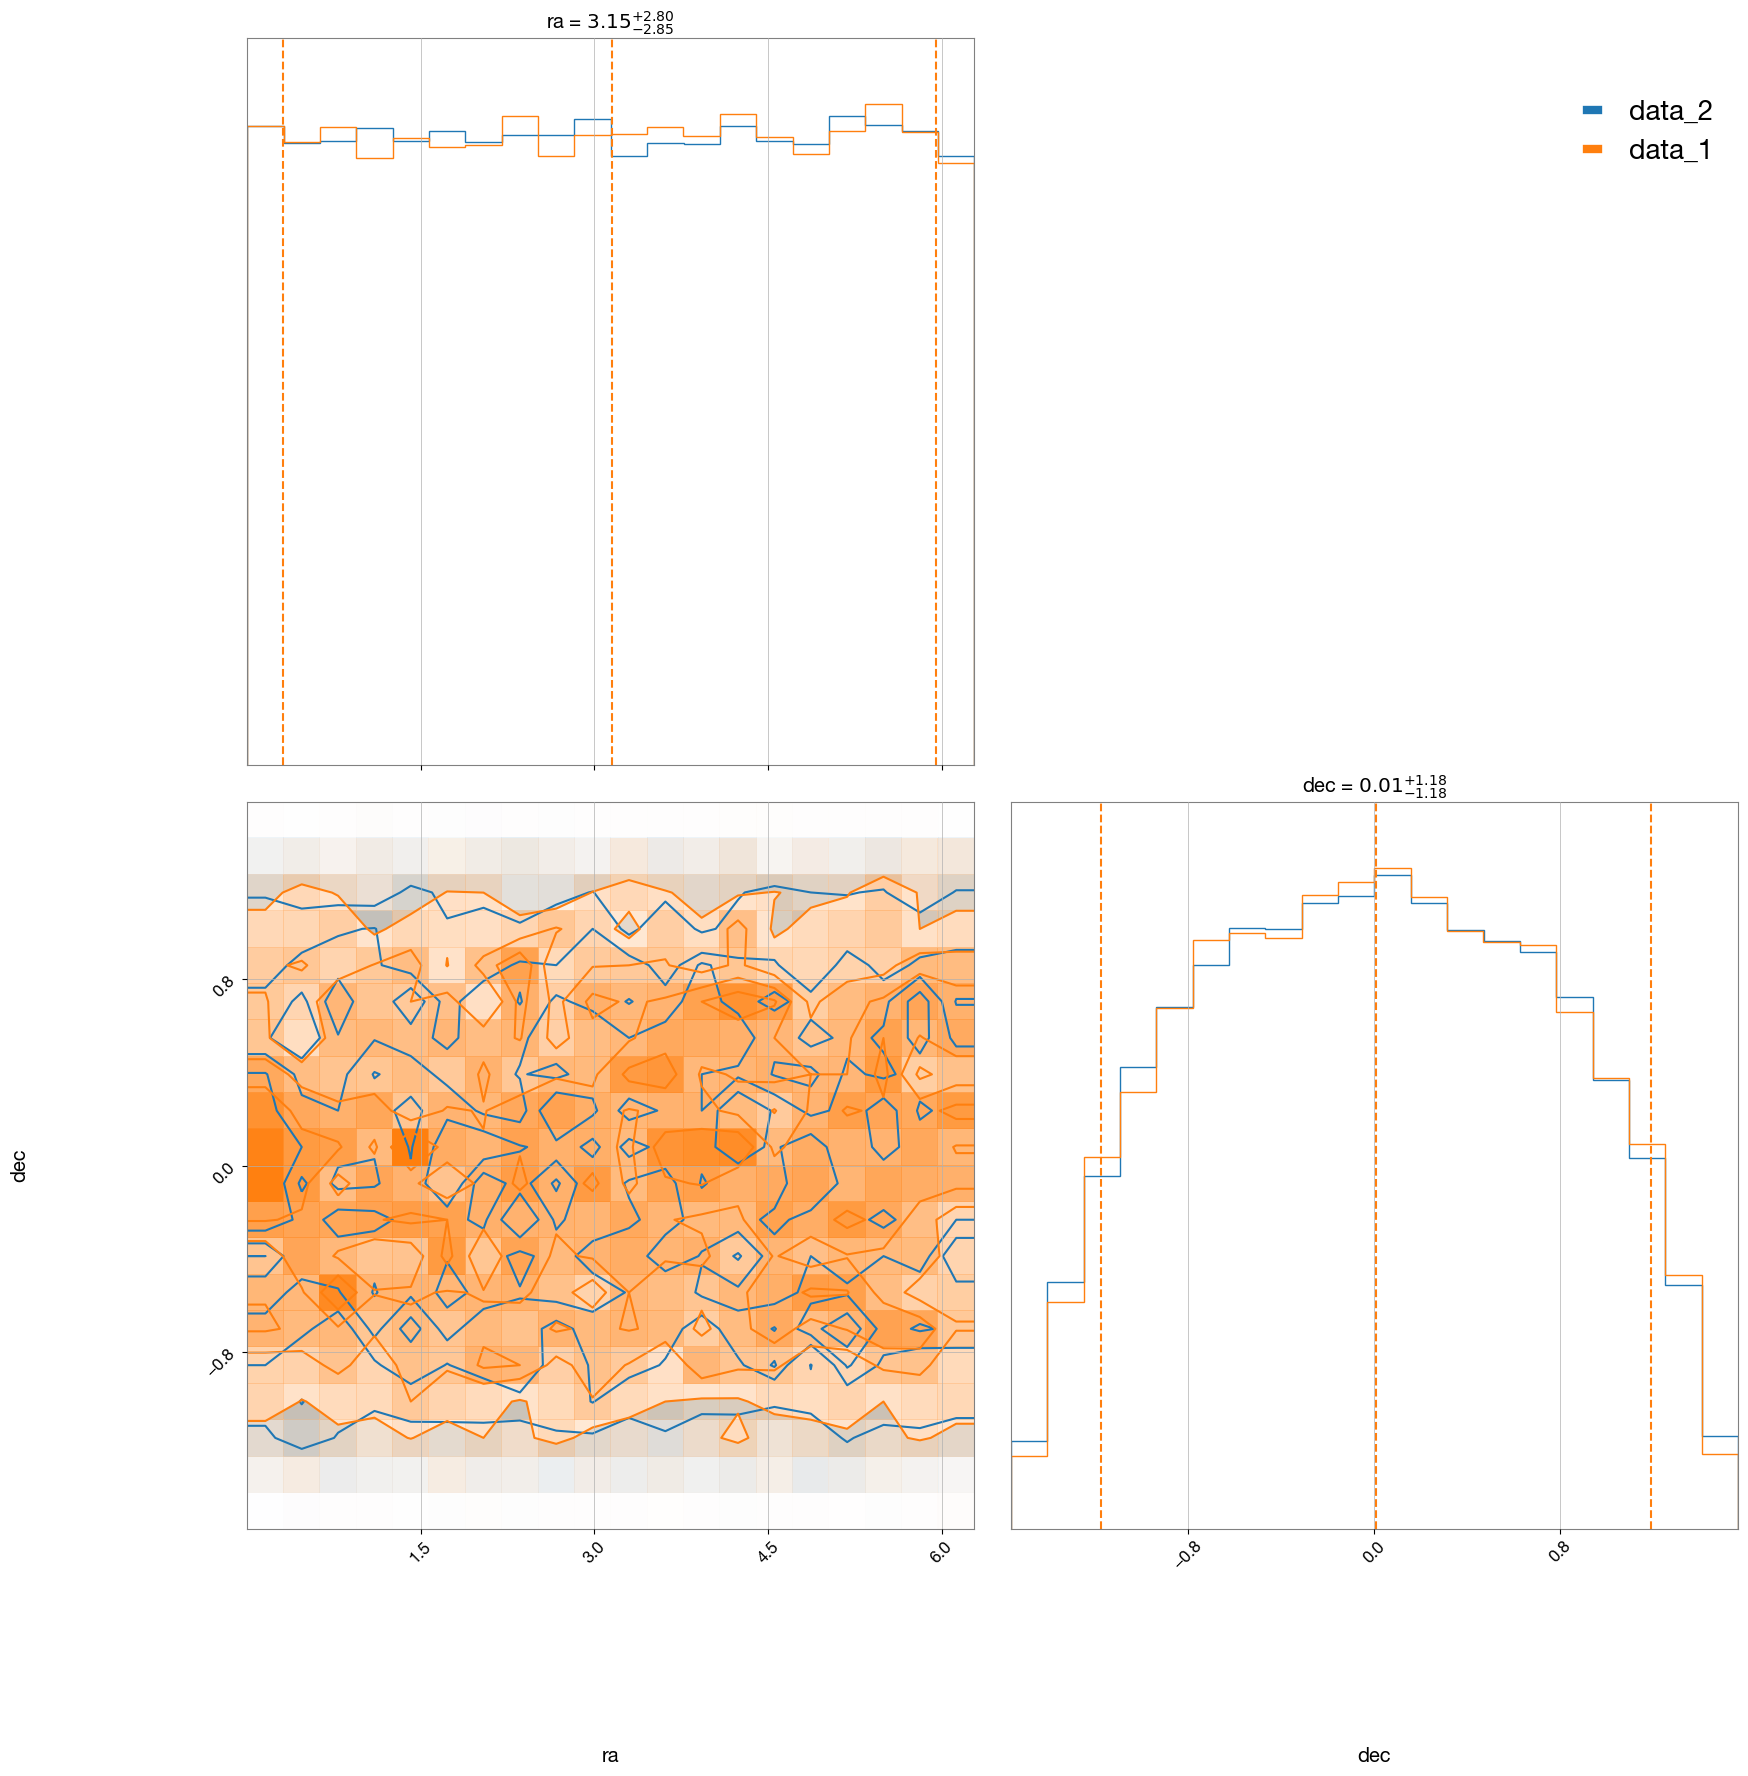

In [16]:
plt.figure(figsize=(5, 5))
pobs.plot(data_dict1=data_new_, data_dict2=data_old_)
plt.show()

### $P_{astro}(m_{1,1}, m_{2,1}, \iota_1, d_{L,1}|H_U)$

In [29]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)

<module 'pobs.modelgenerator_dpgmm' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/modelgenerator_dpgmm.py'>

In [30]:
test = pobs.ModelGenerator(
    model_name='astro_unlensed',
    model_type='astro_unlensed',
    kde_model_type='dpgmm',
    data_dict=None,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)
# time to generate the model: 2m 53.4s

astro_unlensed is None
getting default astro_unlensed data_dict from pobs module
Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_astro_unlensed.pkl 
Saving scaler to ./pobs_data/scaler_path_astro_unlensed.pkl
Saving min_max to ./pobs_data/min_max_path_astro_unlensed.json
Saving renormalization constant to ./pobs_data/renorm_const_path_astro_unlensed.json


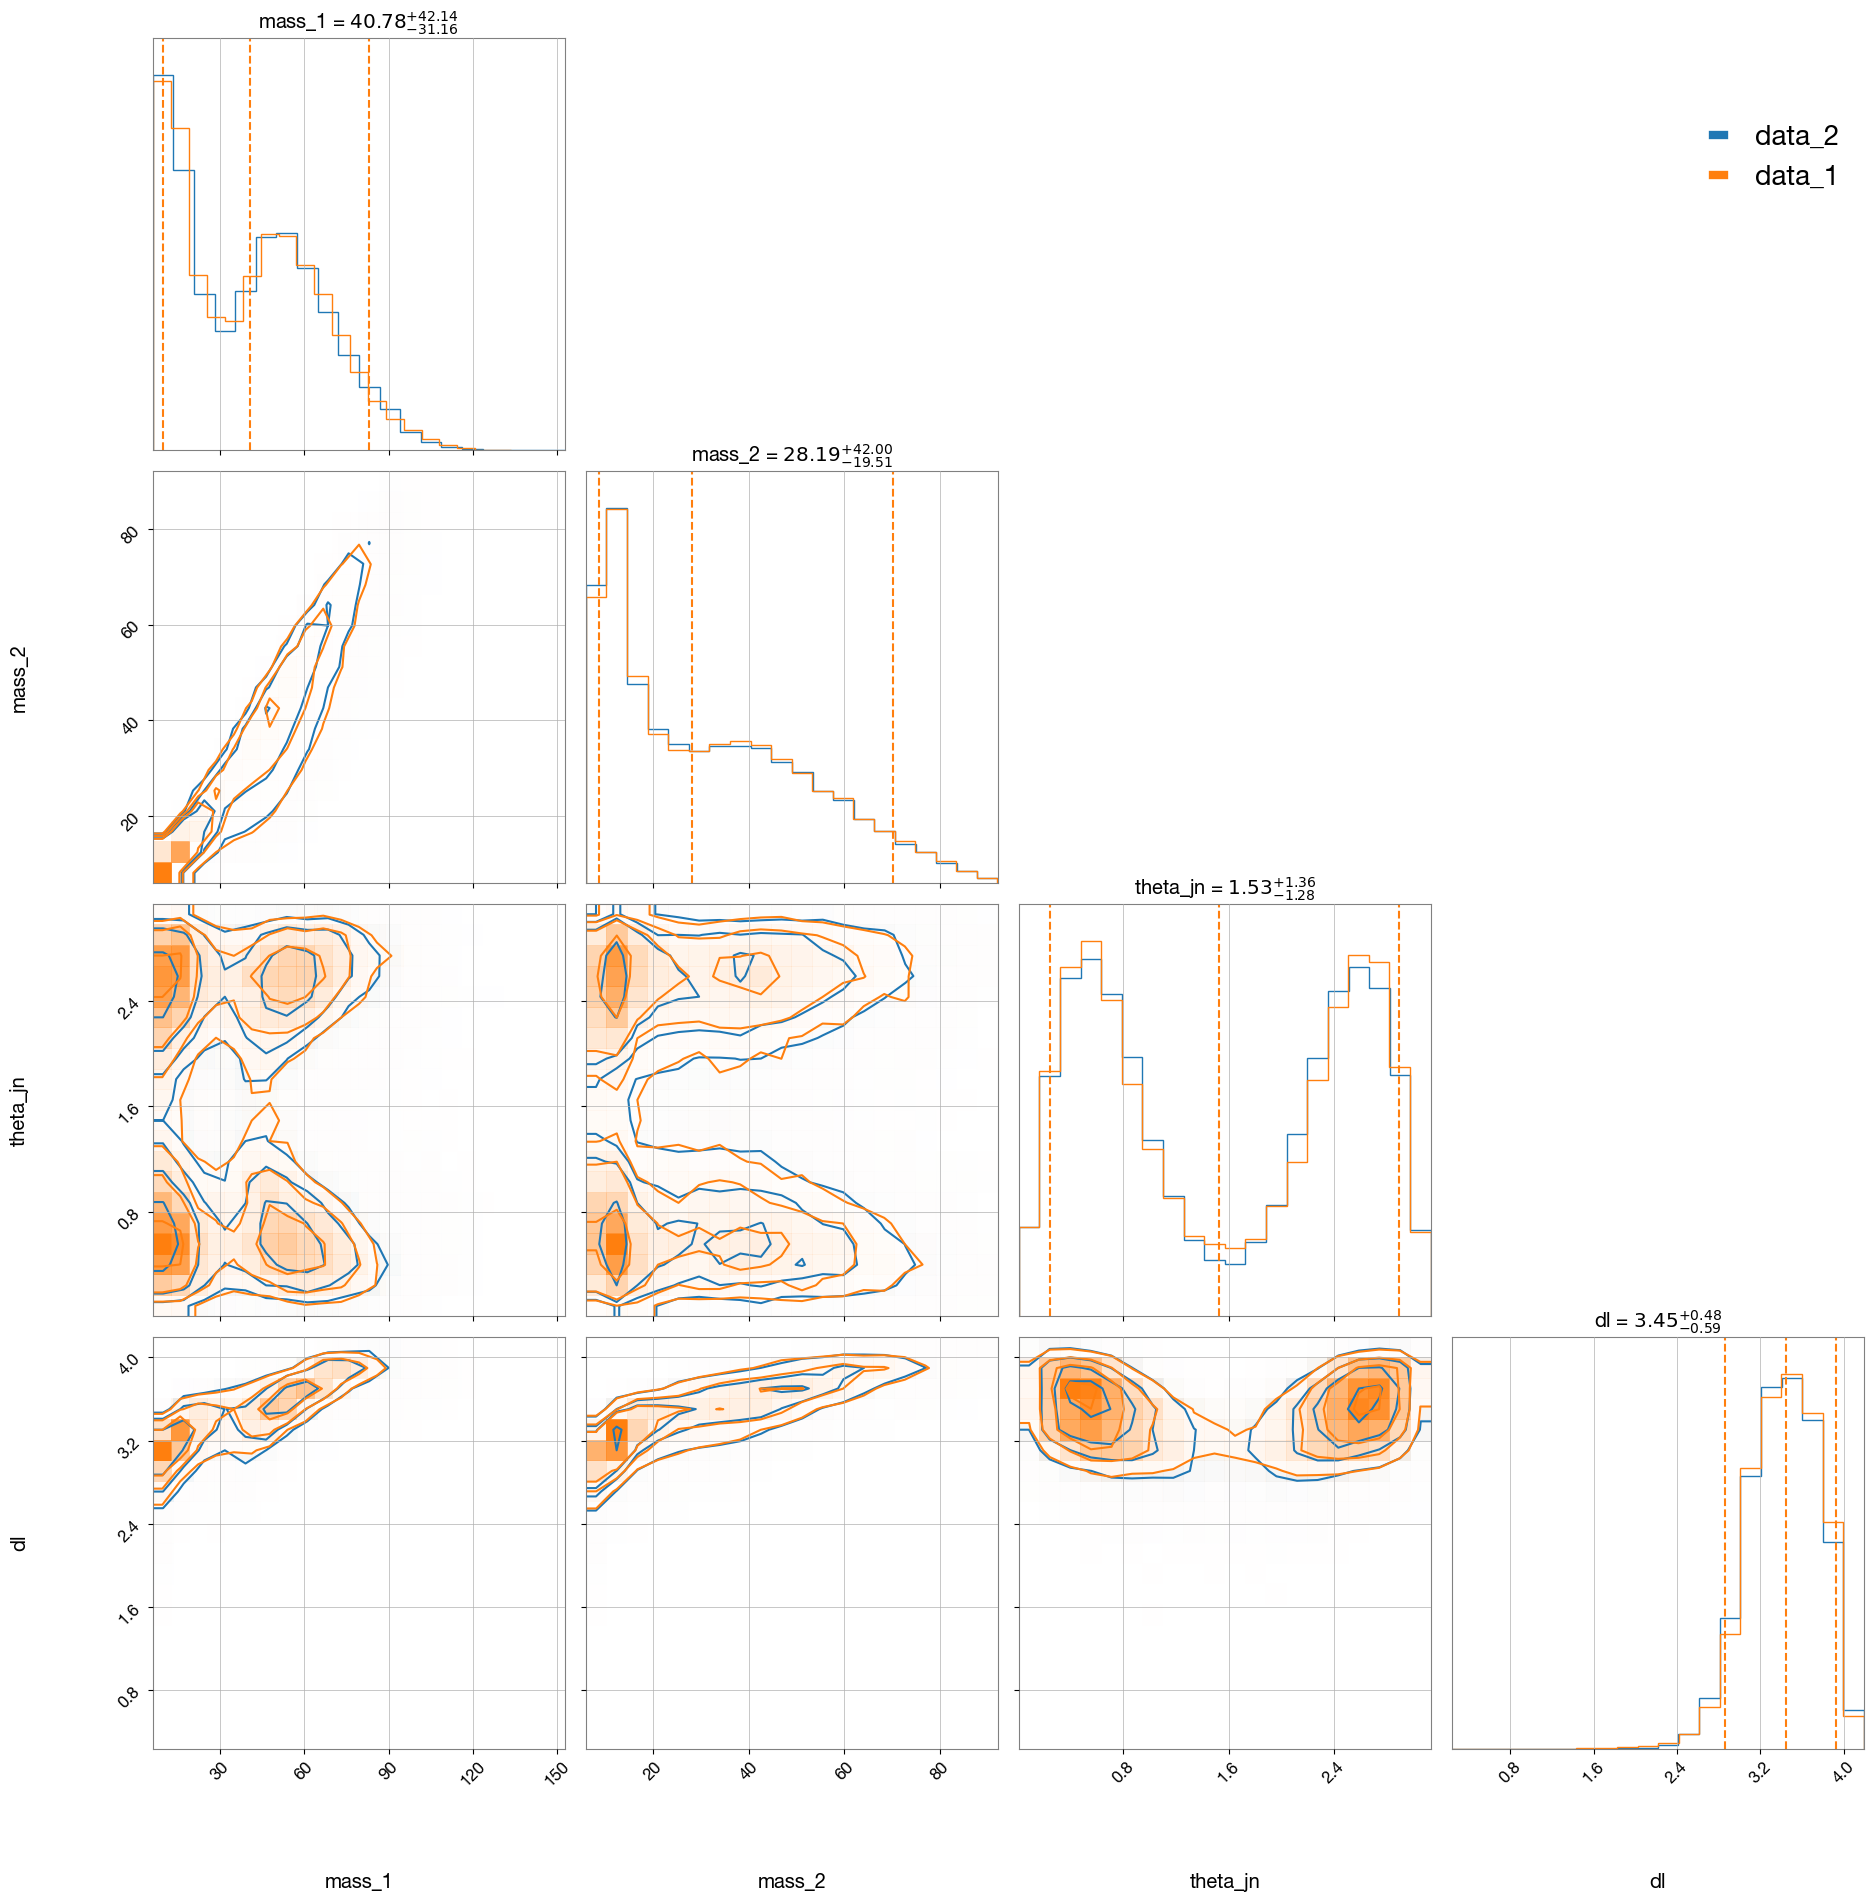

In [33]:
# new data
data_new = test.resample(40000)
data_new_ = data_new.copy()
data_new_['dl'] = np.log10(data_new_['dl'])

# original data
data_old_ = pobs.load_data_from_module("pobs", "data", "n_unlensed_detectable_bbh_po_spin.json")
data_old_ = pobs.data_check_astro_unlensed_dpgmm(data_old_)
data_old_['dl'] = np.log10(data_old_['dl'])

pobs.plot(data_dict1=data_new_, data_dict2=data_old_)
plt.show()

### $P_{astro}(\Delta T|H_U)$

In [39]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)

<module 'pobs.modelgenerator_dpgmm' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/modelgenerator_dpgmm.py'>

In [40]:
test = pobs.ModelGenerator(
    model_name='astro_unlensed_time',
    model_type='astro_unlensed_time',
    kde_model_type='dpgmm',
    data_dict=None,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)

astro_unlensed is None
getting default astro_unlensed data_dict from pobs module
Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_astro_unlensed_time.pkl 
Saving scaler to ./pobs_data/scaler_path_astro_unlensed_time.pkl
Saving min_max to ./pobs_data/min_max_path_astro_unlensed_time.json
Saving renormalization constant to ./pobs_data/renorm_const_path_astro_unlensed_time.json


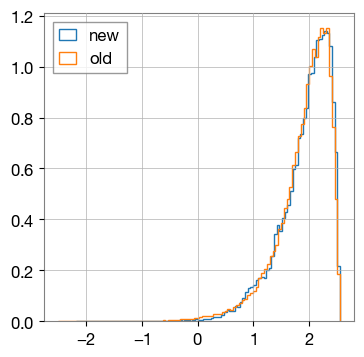

In [46]:
# new data
data_new = test.resample(40000)
data_new_ = data_new.copy()
data_new_['dt'] = np.log10(data_new_['dt']/86400)

# original data
data_old_ = pobs.load_data_from_module("pobs", "data", "n_unlensed_detectable_bbh_po_spin.json")
data_old_ = pobs.data_check_astro_unlensed_time_dpgmm(data_old_)
data_old_['dt'] = np.log10(data_old_['dt']/86400)

plt.figure(figsize=(4, 4))
plt.hist(data_new_['dt'], bins=100, density=True, histtype='step', label='new')
plt.hist(data_old_['dt'], bins=100, density=True, histtype='step', label='old')
plt.legend()
plt.show()

### $P(\alpha_2, \delta_2 | H_U)$

In [14]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)
importlib.reload(pobs.meta_dict)

<module 'pobs.meta_dict' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/meta_dict.py'>

In [15]:
test = pobs.ModelGenerator(
    model_name='astro_unlensed_sky',
    model_type='astro_unlensed_sky',
    kde_model_type='dpgmm',
    data_dict=None,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)

data_dict is None
getting default astro_unlensed data_dict from pobs module
Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_astro_unlensed_sky.pkl 
Saving scaler to ./pobs_data/scaler_path_astro_unlensed_sky.pkl
Saving min_max to ./pobs_data/min_max_path_astro_unlensed_sky.json
Saving renormalization constant to ./pobs_data/renorm_const_path_astro_unlensed_sky.json


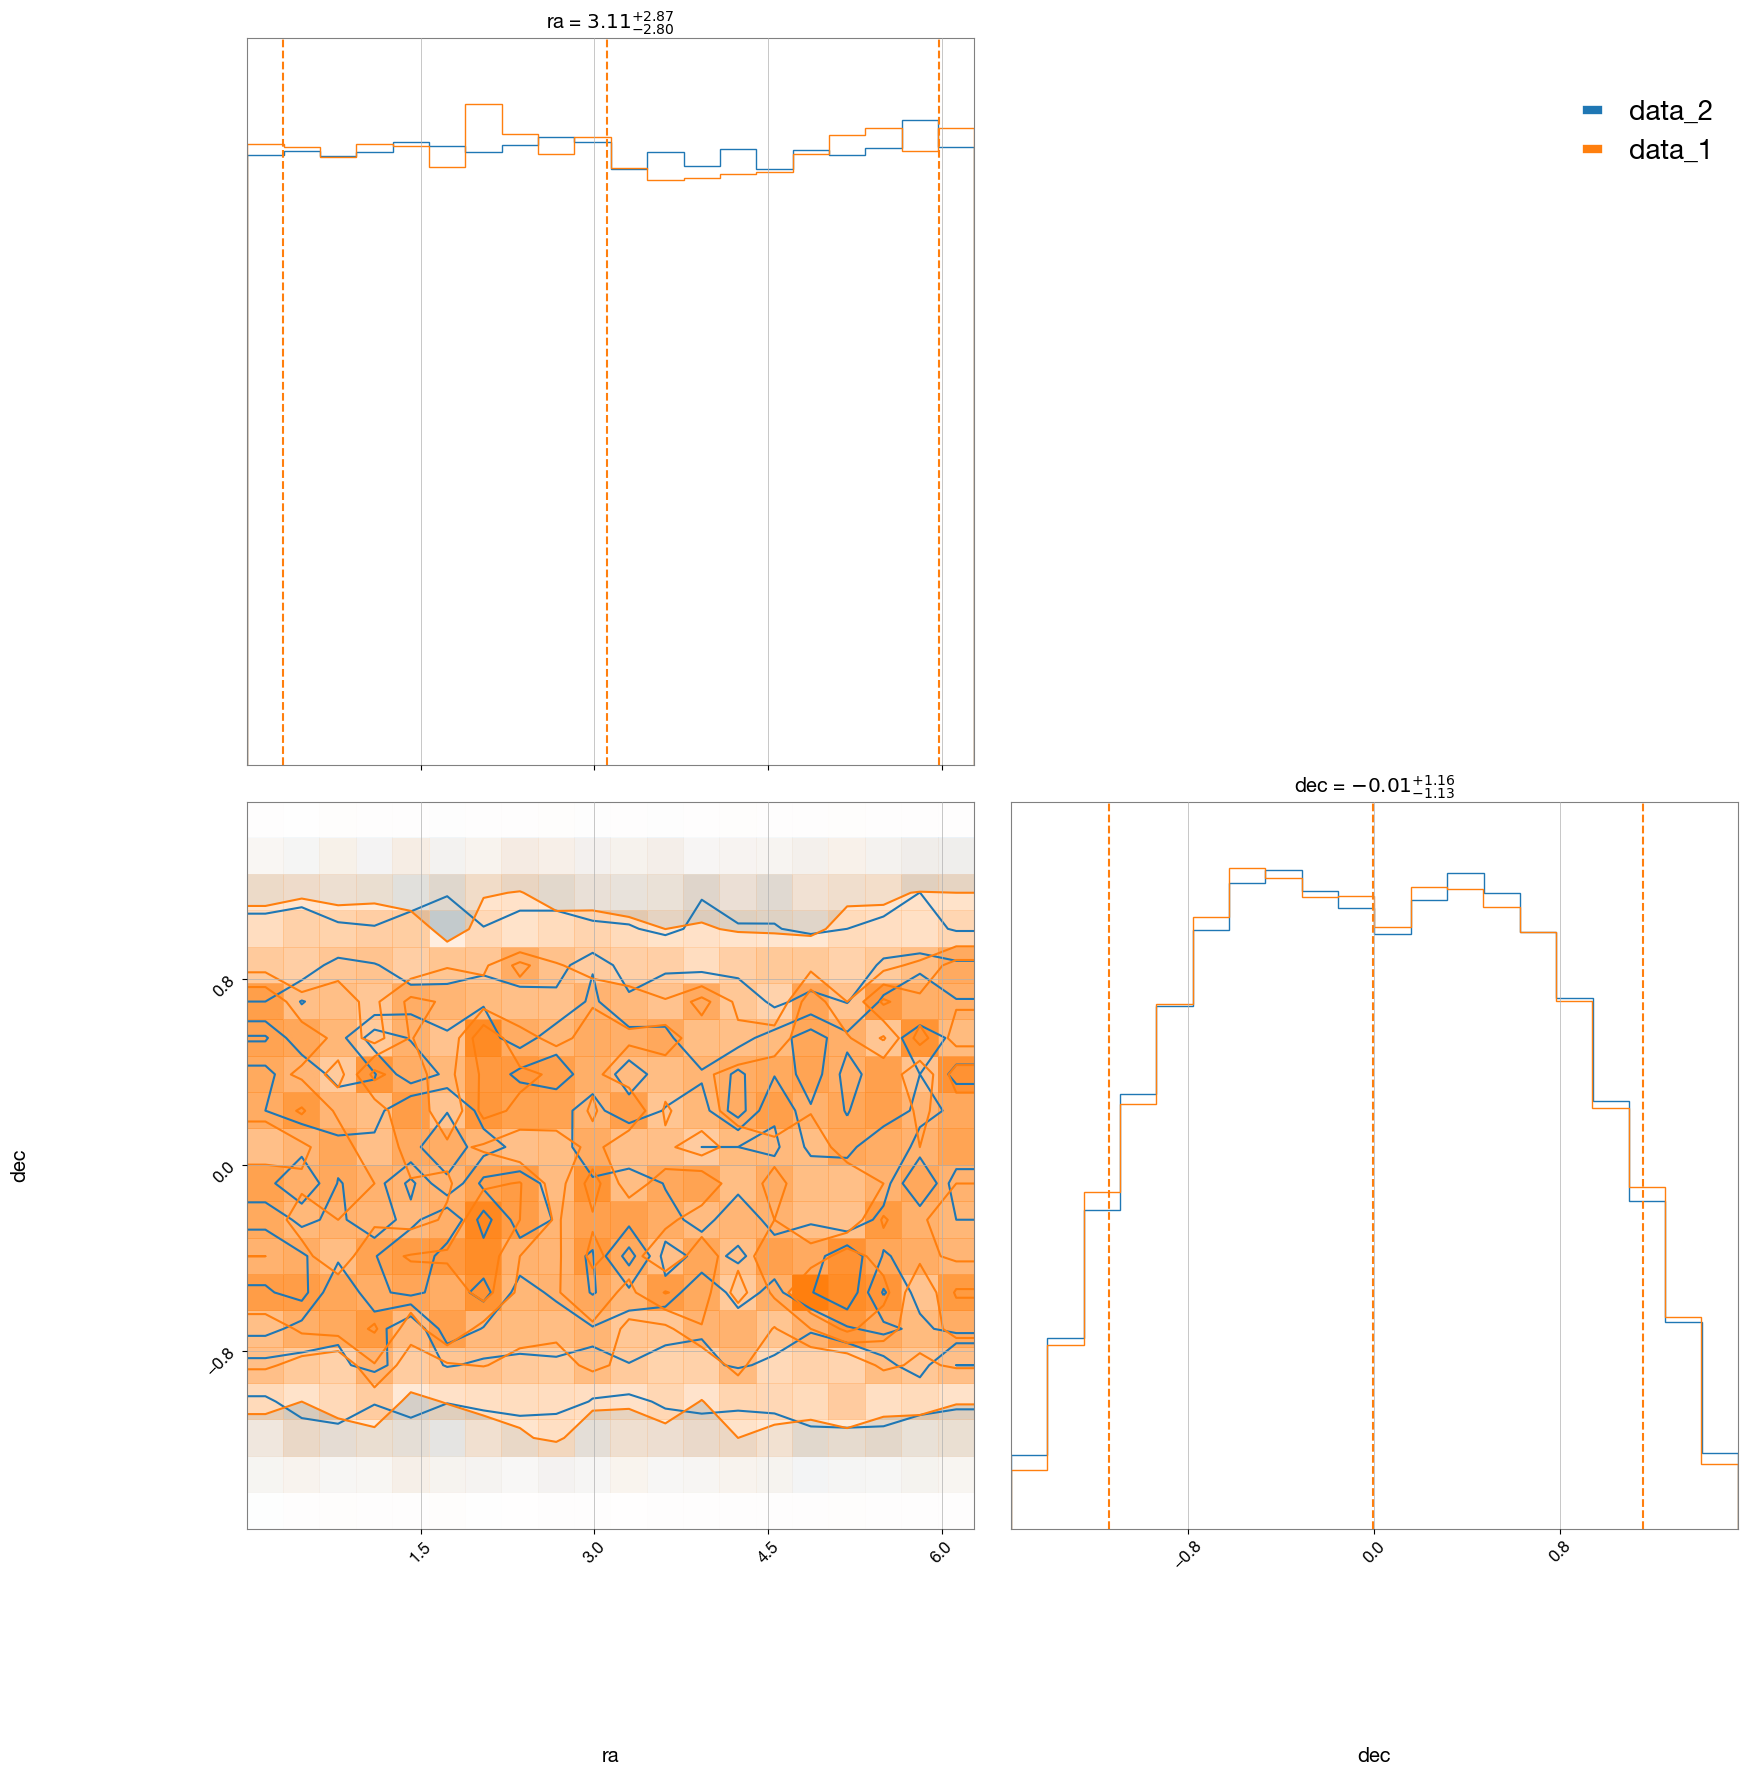

In [17]:
# new data
data_new = test.resample(40000)
data_new_ = data_new.copy()

# original data
data_old_ = pobs.load_data_from_module("pobs", "data", "n_unlensed_detectable_bbh_po_spin.json")
data_old_ = pobs.data_check_astro_unlensed_sky_dpgmm(data_old_)

pobs.plot(data_dict1=data_new_, data_dict2=data_old_)
plt.show()

### $P(m_1, m_2, \iota, d_{L,1}|T_1, d_1)$

In [29]:
# get data
posterior = load_hdf5('/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/data/image1.hdf5')
posterior = posterior['posterior']
mass_1 = posterior['mass_1']
mass_2 = posterior['mass_2']
theta_jn = posterior['theta_jn']
dl = posterior['luminosity_distance']

data_dict = {
    'mass_1': mass_1,
    'mass_2': mass_2,
    'theta_jn': theta_jn,
    'dl': dl,
}

In [30]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)
importlib.reload(pobs.meta_dict)

<module 'pobs.meta_dict' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/meta_dict.py'>

In [31]:
test = pobs.ModelGenerator(
    model_name='posterior1',
    model_type='posterior',
    kde_model_type='dpgmm',
    data_dict=data_dict,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)

Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_posterior1.pkl 
Saving scaler to ./pobs_data/scaler_path_posterior1.pkl
Saving min_max to ./pobs_data/min_max_path_posterior1.json
Saving renormalization constant to ./pobs_data/renorm_const_path_posterior1.json


<Figure size 500x500 with 0 Axes>

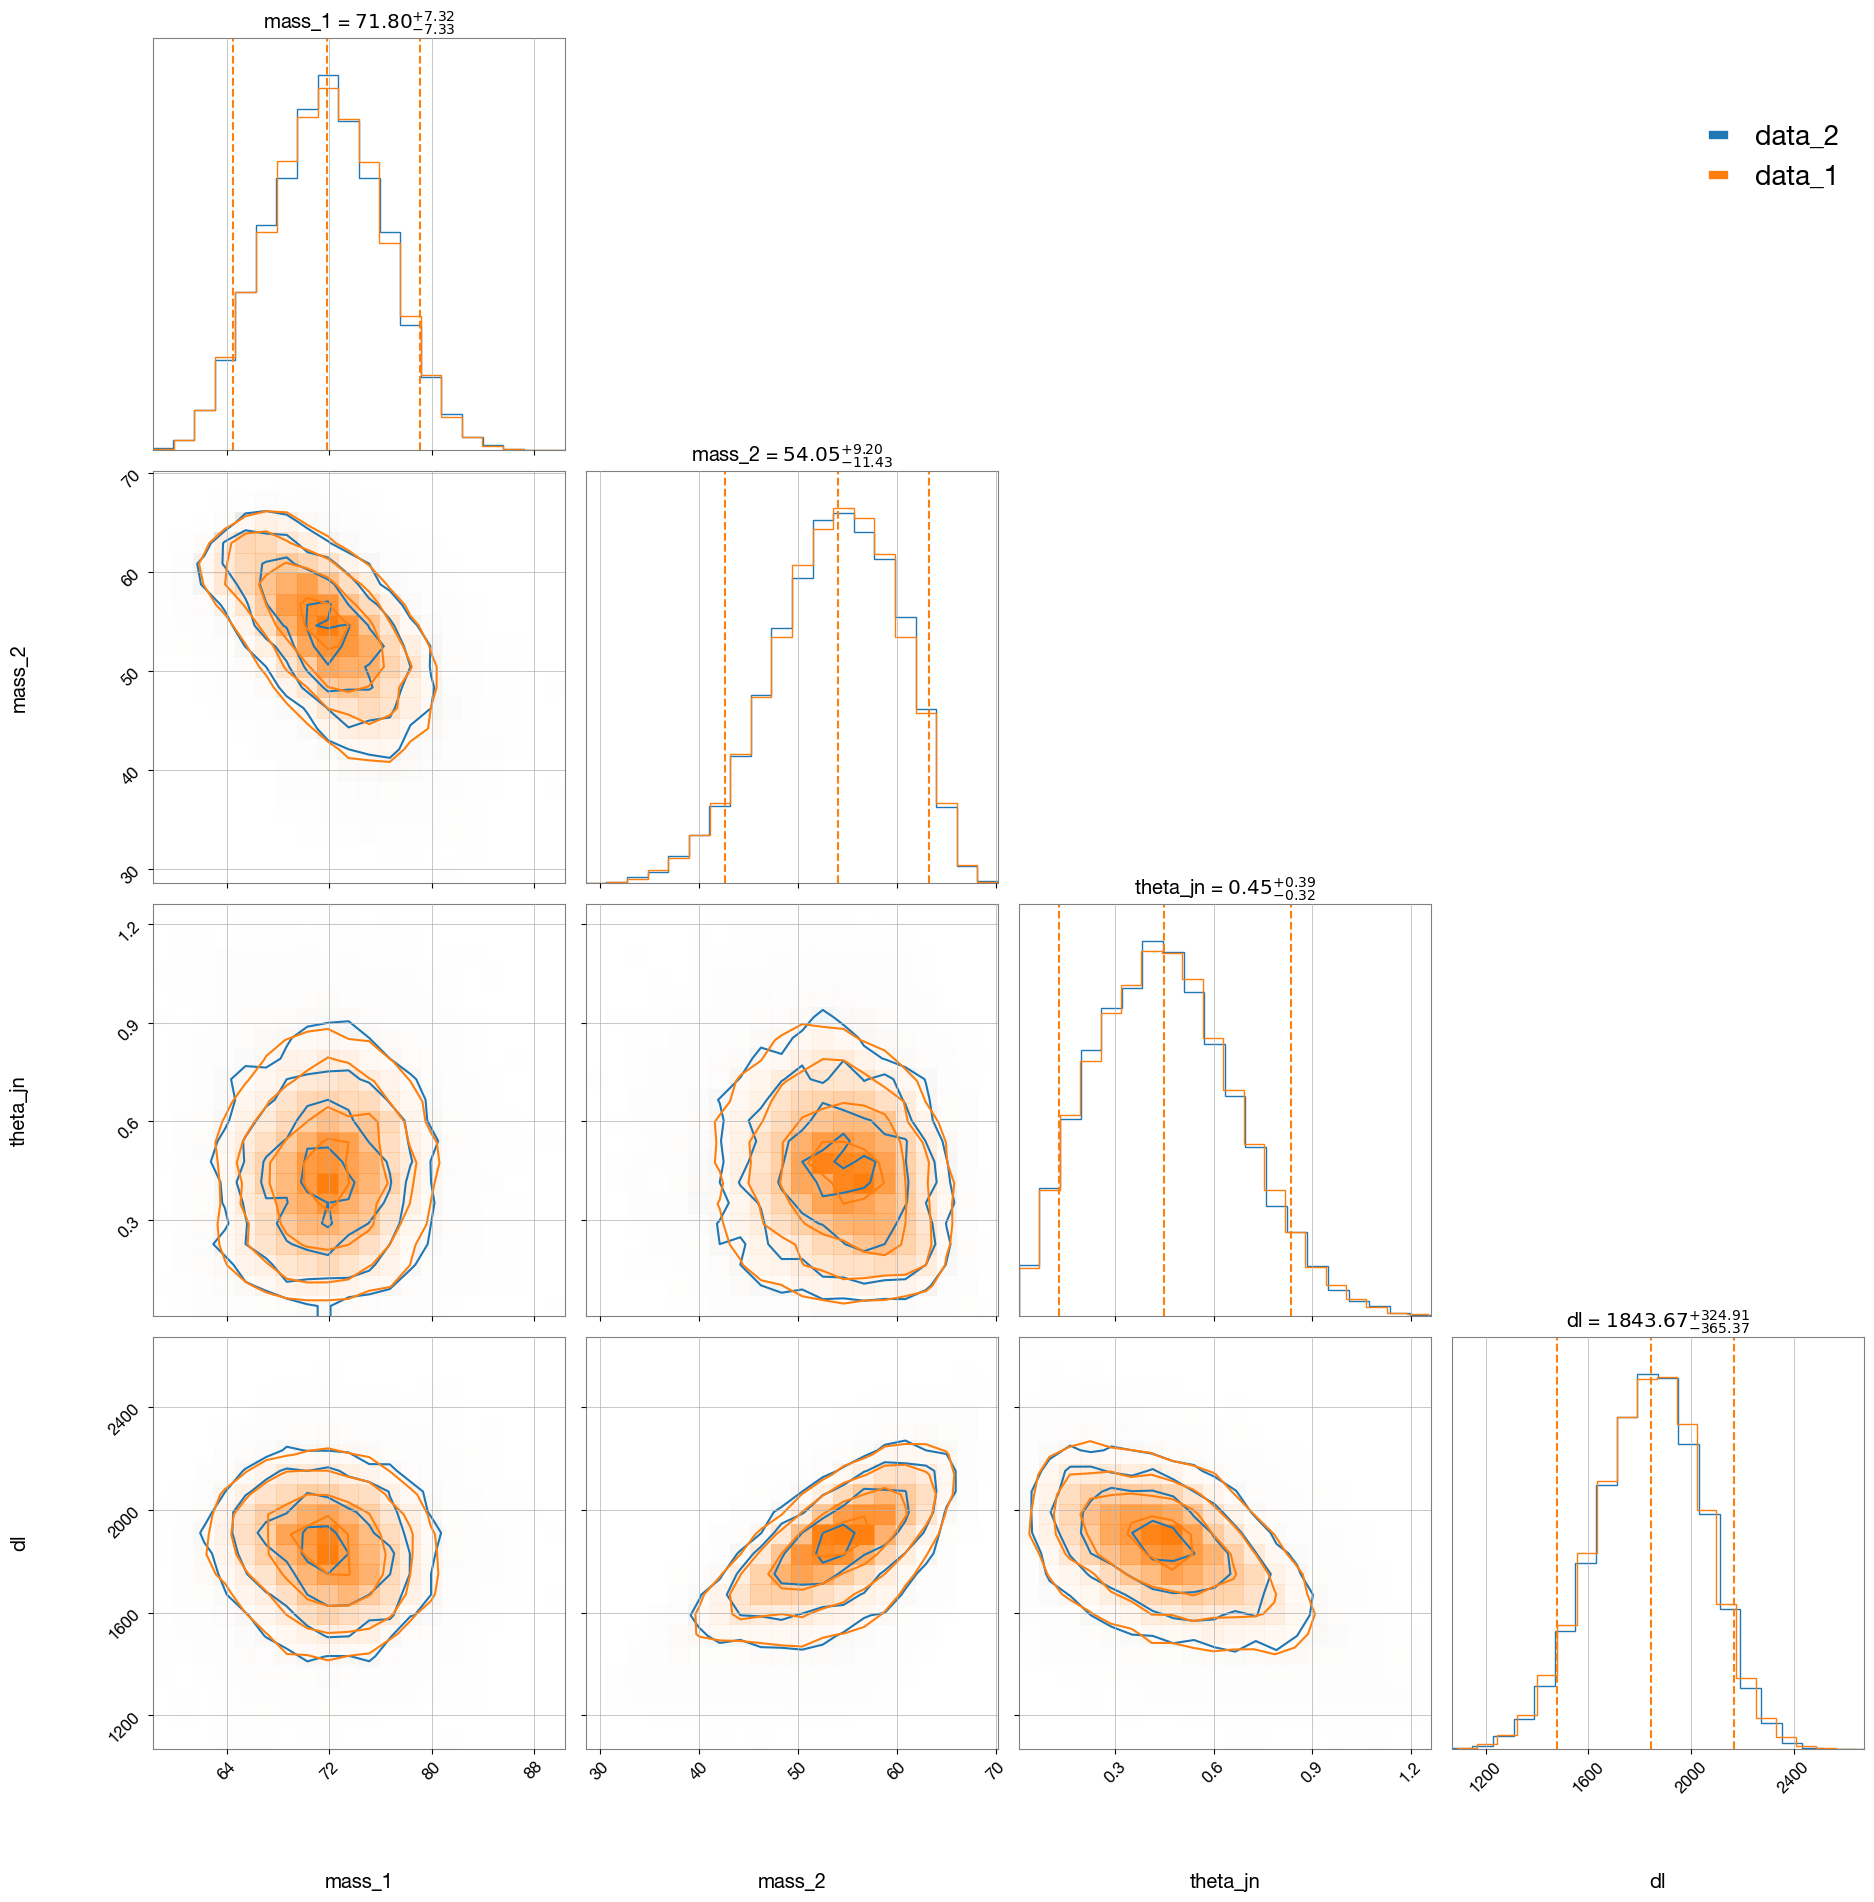

In [32]:
data_new = test.resample(40000)
data_new_ = data_new.copy()

plt.figure(figsize=(5, 5))
pobs.plot(data_dict1=data_new_, data_dict2=data_dict)
plt.show()

### $P(\alpha, \delta | T_1, d_1)$

In [42]:
# get data
posterior = load_hdf5('/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/data/image1.hdf5')
posterior = posterior['posterior']
ra = np.array(posterior['ra'])
dec = np.array(posterior['dec'])

data_dict = {
    'ra': ra,
    'dec': dec,
}

In [44]:
test = pobs.ModelGenerator(
    model_name='posterior1_sky',
    model_type='posterior_sky',
    kde_model_type='dpgmm',
    data_dict=data_dict,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)

Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_posterior1_sky.pkl 
Saving scaler to ./pobs_data/scaler_path_posterior1_sky.pkl
Saving min_max to ./pobs_data/min_max_path_posterior1_sky.json
Saving renormalization constant to ./pobs_data/renorm_const_path_posterior1_sky.json


<Figure size 500x500 with 0 Axes>

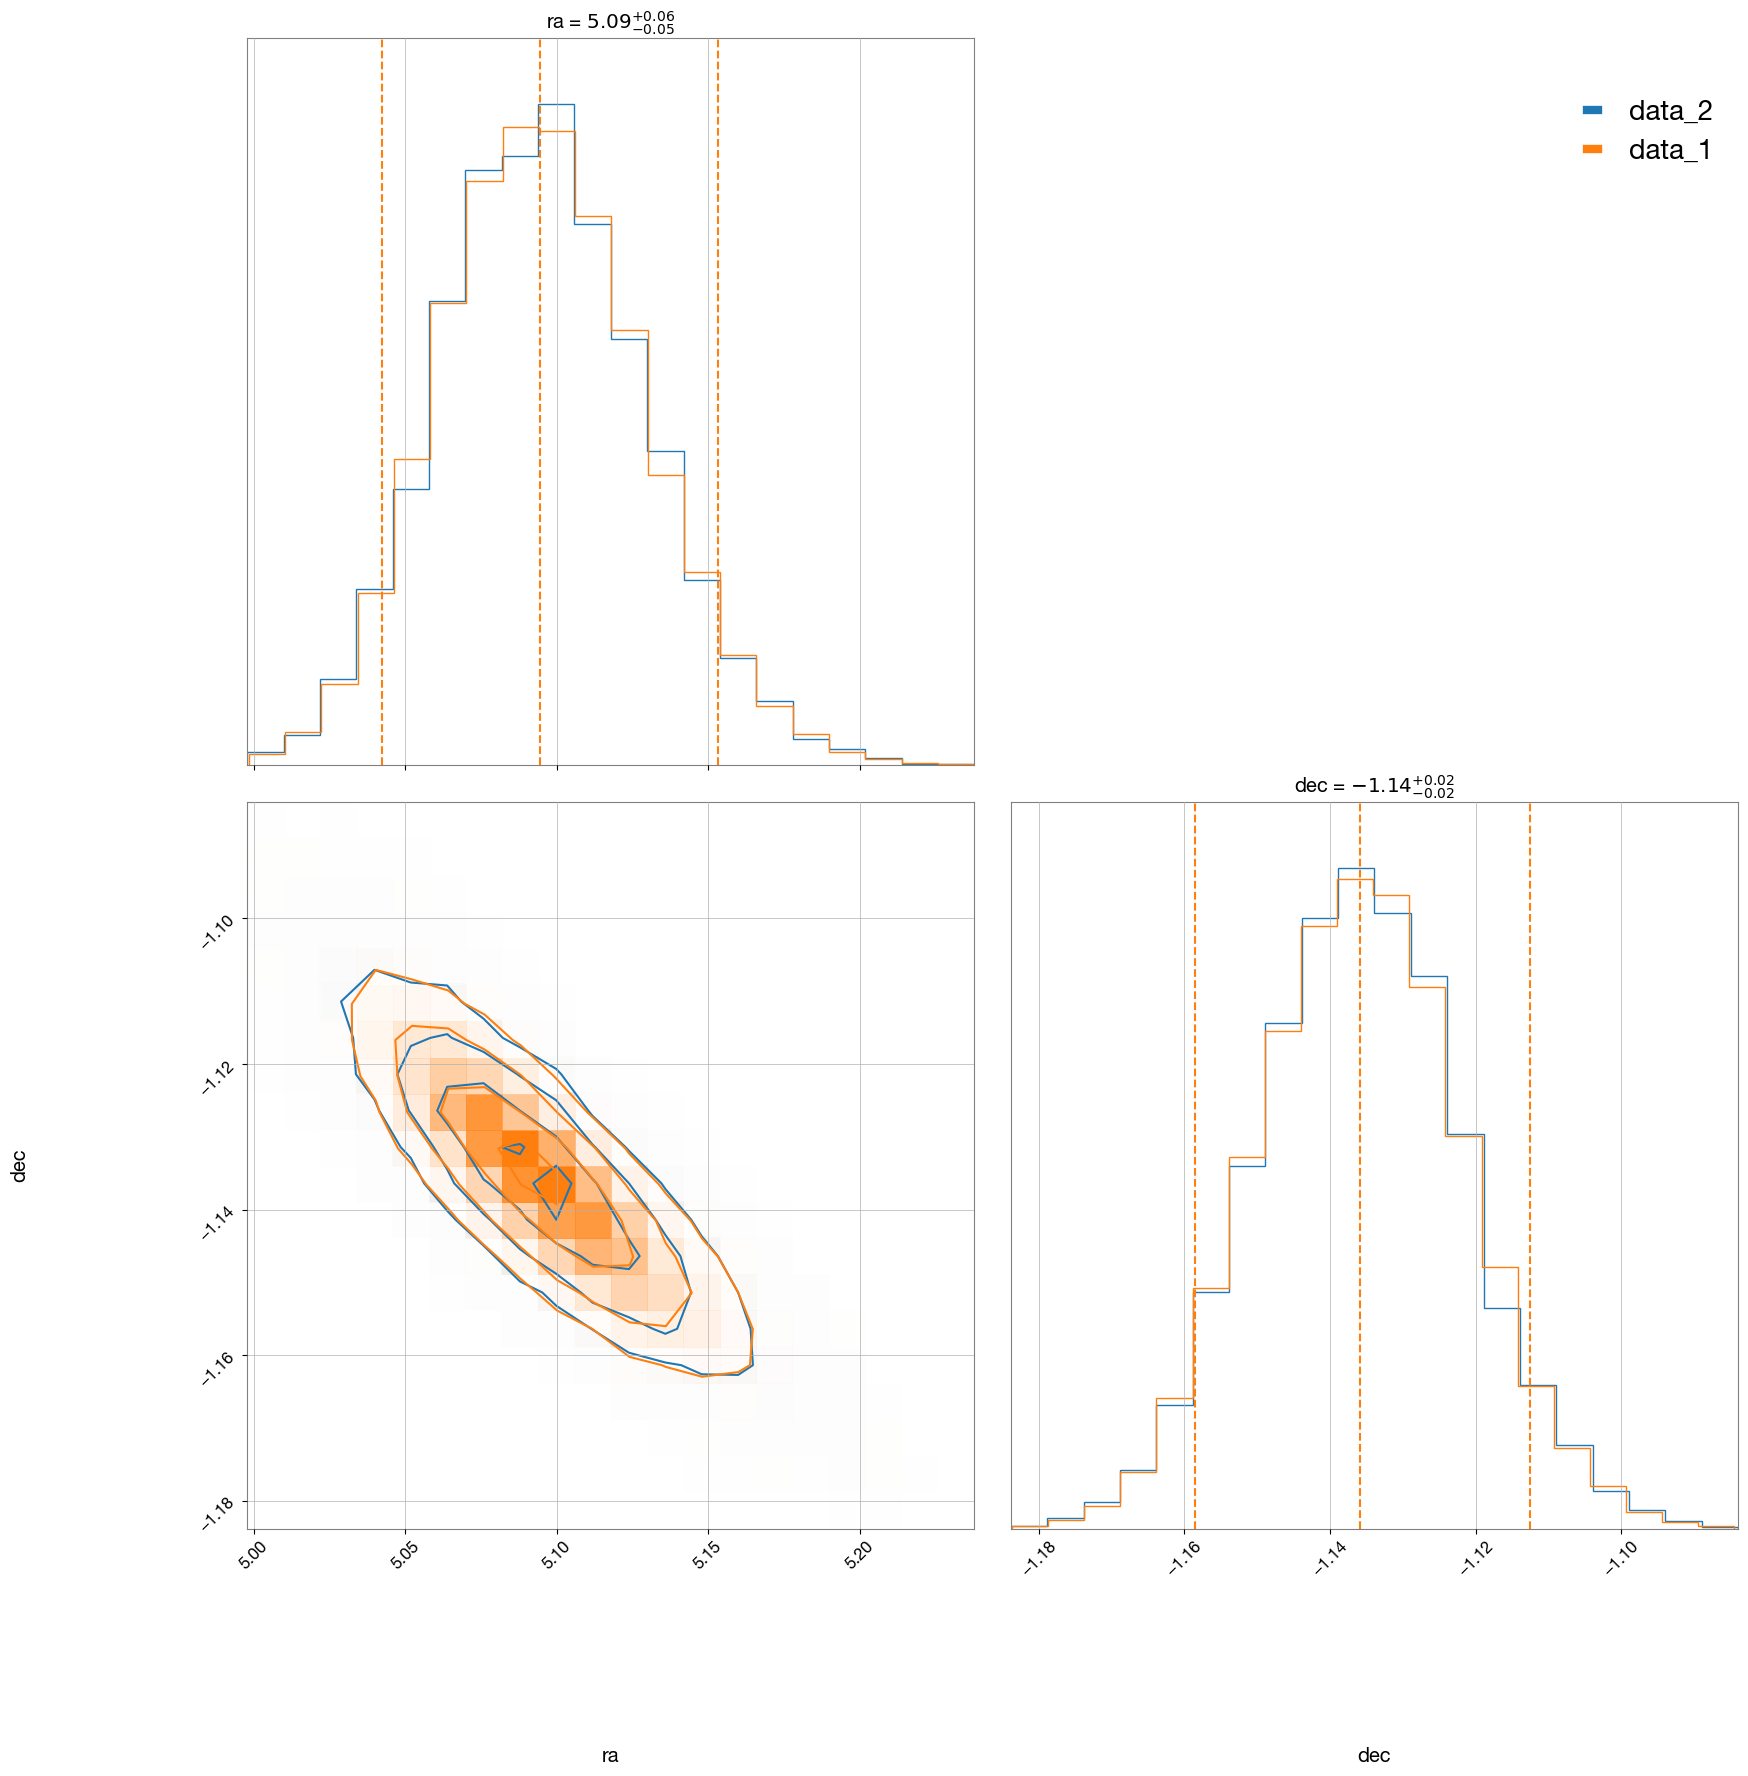

In [45]:
data_new = test.resample(40000)
data_new_ = data_new.copy()

plt.figure(figsize=(5, 5))
pobs.plot(data_dict1=data_new_, data_dict2=data_dict)
plt.show()

### $P(m_1, m_2, \iota, d_{L,2}|T_2, d_2)$

In [33]:
# get data
posterior = load_hdf5('/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/data/image2.hdf5')
posterior = posterior['posterior']
mass_1 = posterior['mass_1']
mass_2 = posterior['mass_2']
theta_jn = posterior['theta_jn']
dl = posterior['luminosity_distance']

data_dict = {
    'mass_1': mass_1,
    'mass_2': mass_2,
    'theta_jn': theta_jn,
    'dl': dl,
}

In [34]:
test = pobs.ModelGenerator(
    model_name='posterior2',
    model_type='posterior',
    kde_model_type='dpgmm',
    data_dict=data_dict,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=True,
)

Fitting the model. This may take a while...
Saving model to ./pobs_data/model_path_posterior2.pkl 
Saving scaler to ./pobs_data/scaler_path_posterior2.pkl
Saving min_max to ./pobs_data/min_max_path_posterior2.json
Saving renormalization constant to ./pobs_data/renorm_const_path_posterior2.json


<Figure size 500x500 with 0 Axes>

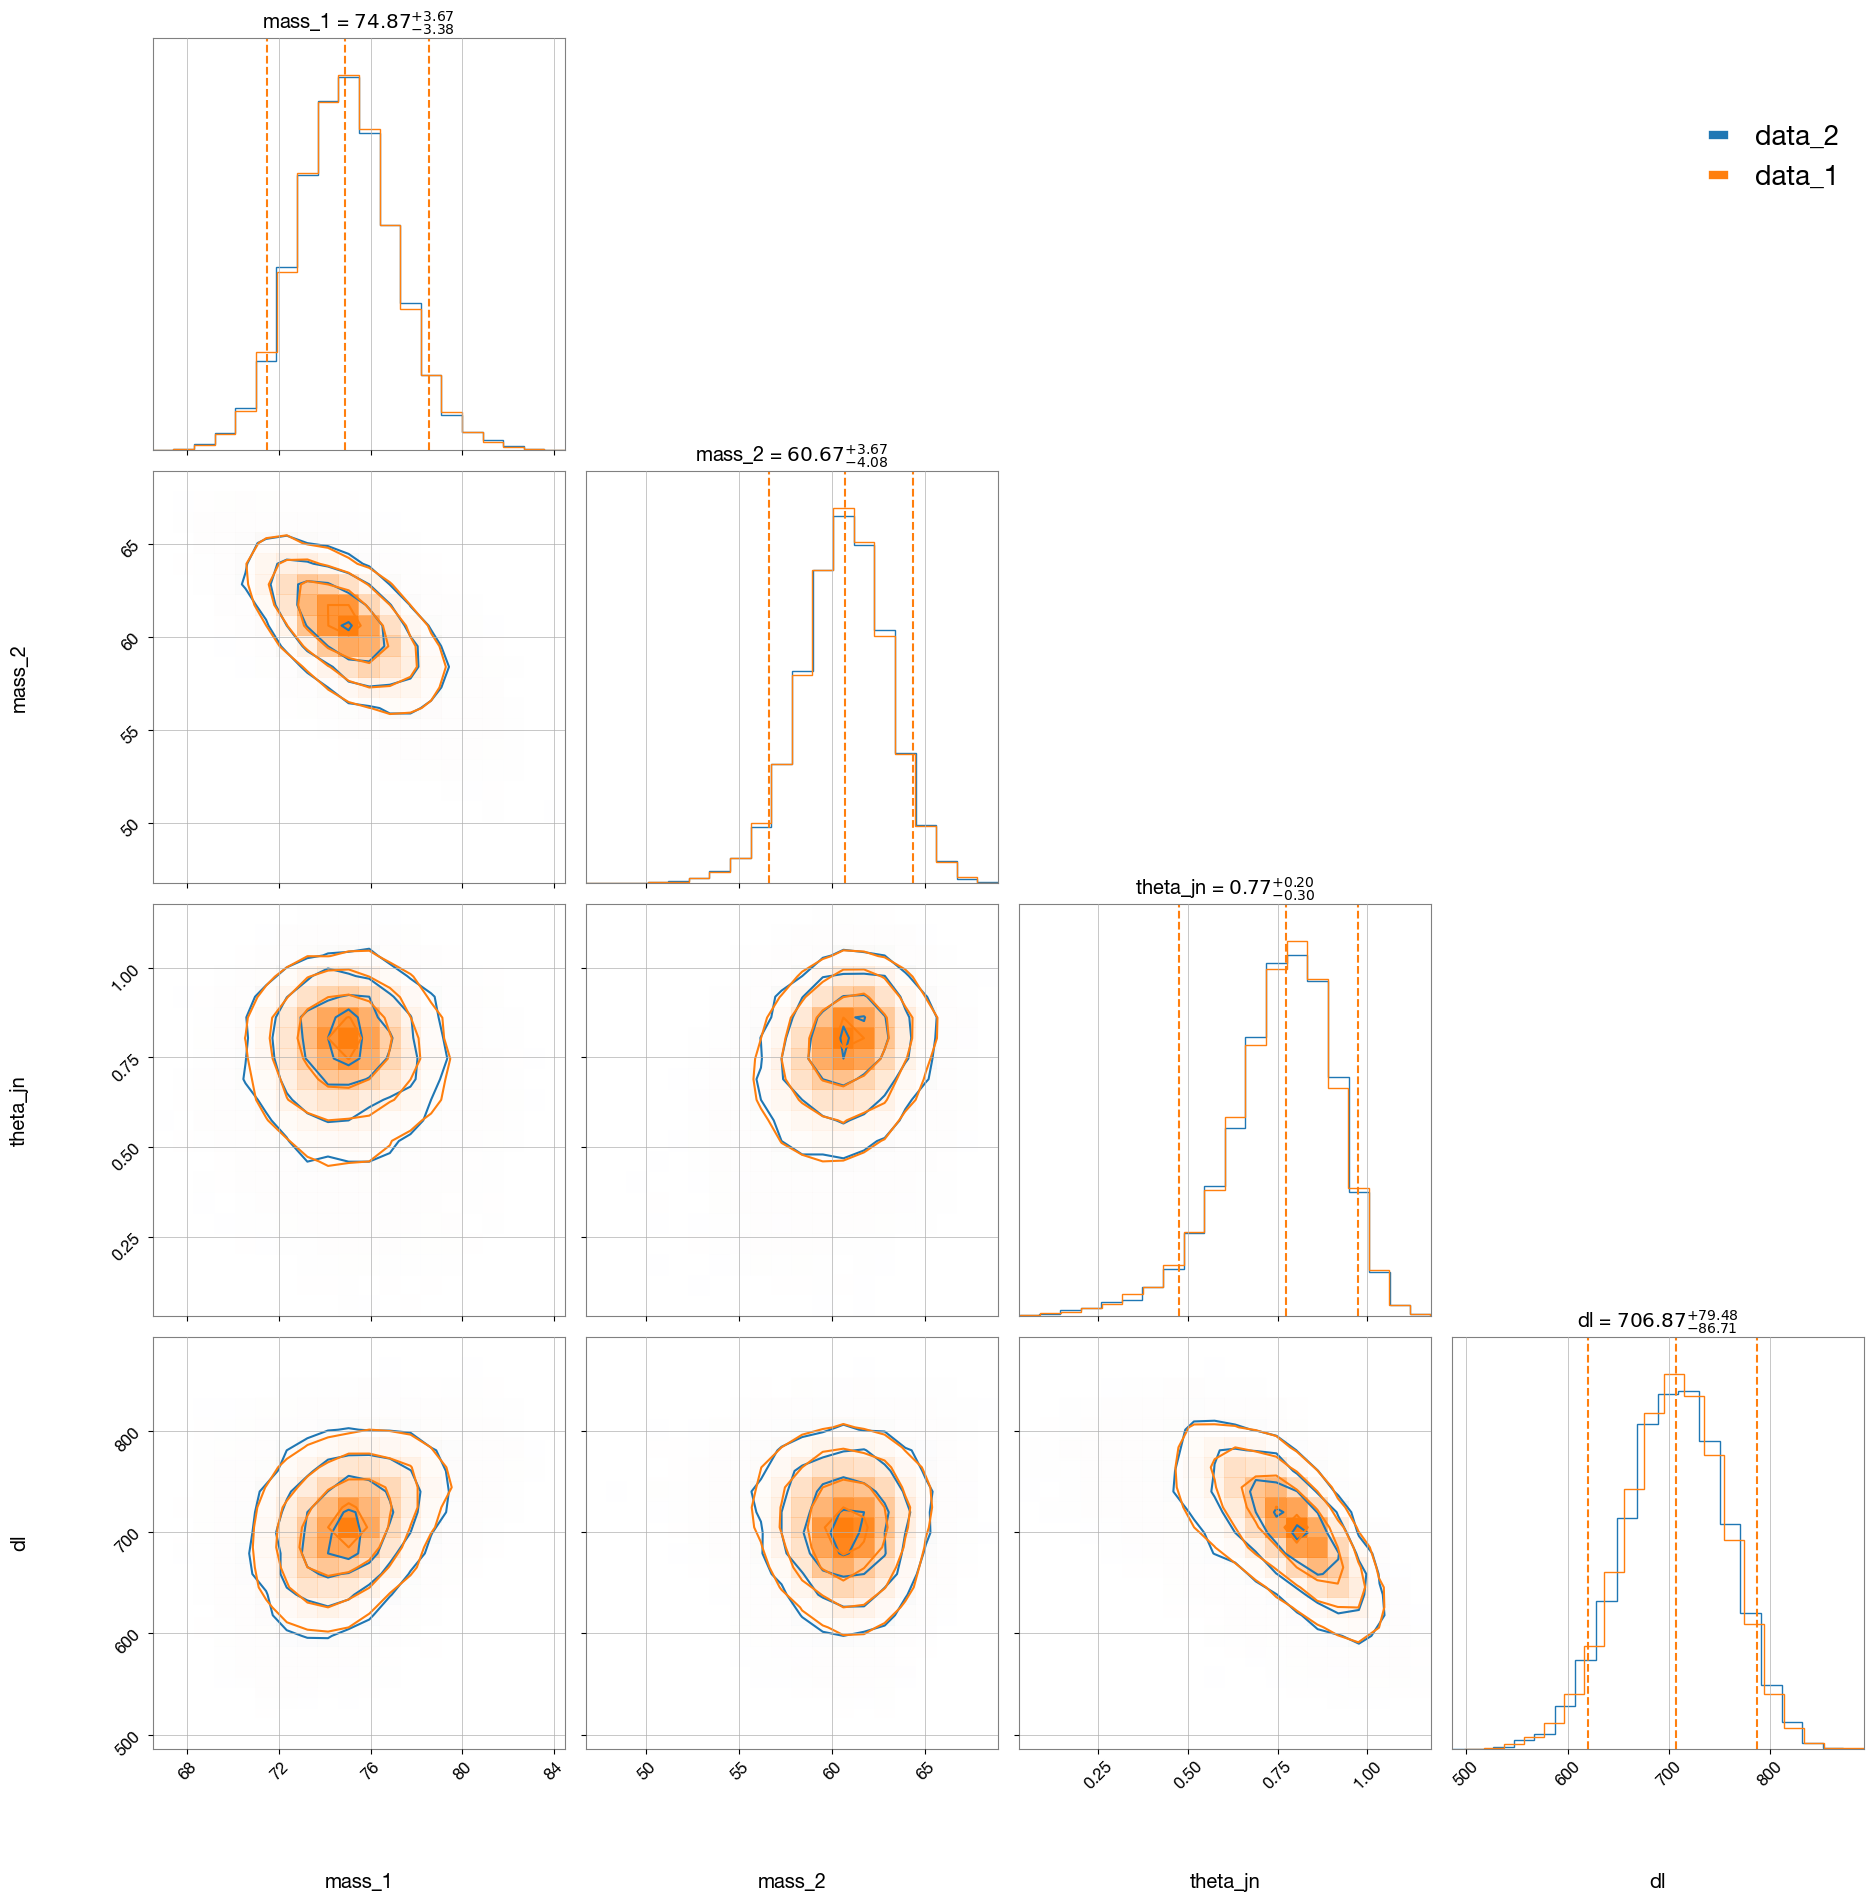

In [35]:
data_new = test.resample(40000)
data_new_ = data_new.copy()

plt.figure(figsize=(5, 5))
pobs.plot(data_dict1=data_new_, data_dict2=data_dict)
plt.show()

### $P(\alpha, \delta | T_2, d_2)$

In [55]:
# reload
import importlib
importlib.reload(pobs)
importlib.reload(pobs.utils)
importlib.reload(pobs.modelgenerator_dpgmm)

<module 'pobs.modelgenerator_dpgmm' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/modelgenerator_dpgmm.py'>

In [56]:
# get data
posterior = load_hdf5('/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/data/image2.hdf5')
posterior = posterior['posterior']
ra = np.array(posterior['ra'])
dec = np.array(posterior['dec'])

data_dict = {
    'ra': ra,
    'dec': dec,
}

In [57]:
test = pobs.ModelGenerator(
    model_name='posterior2_sky',
    model_type='posterior_sky',
    kde_model_type='dpgmm',
    data_dict=data_dict,  # if provided new model will be generated
    pobs_directory="./pobs_data",
    create_new=False,
)

Fitting the model for posterior2_sky. This may take a while...
Saving model to ./pobs_data/model_path_posterior2_sky.pkl 
Saving scaler to ./pobs_data/scaler_path_posterior2_sky.pkl
Saving min_max to ./pobs_data/min_max_path_posterior2_sky.json
Saving renormalization constant to ./pobs_data/renorm_const_path_posterior2_sky.json


In [59]:
test.meta_dict

{'scaling_param': {'ra': 'ra_scaler', 'dec': None},
 'model_path': './pobs_data/model_path_posterior2_sky.pkl',
 'scaler_path': './pobs_data/scaler_path_posterior2_sky.pkl',
 'min_max_path': './pobs_data/min_max_path_posterior2_sky.json',
 'renorm_const_path': './pobs_data/renorm_const_path_posterior2_sky.json'}

<Figure size 500x500 with 0 Axes>

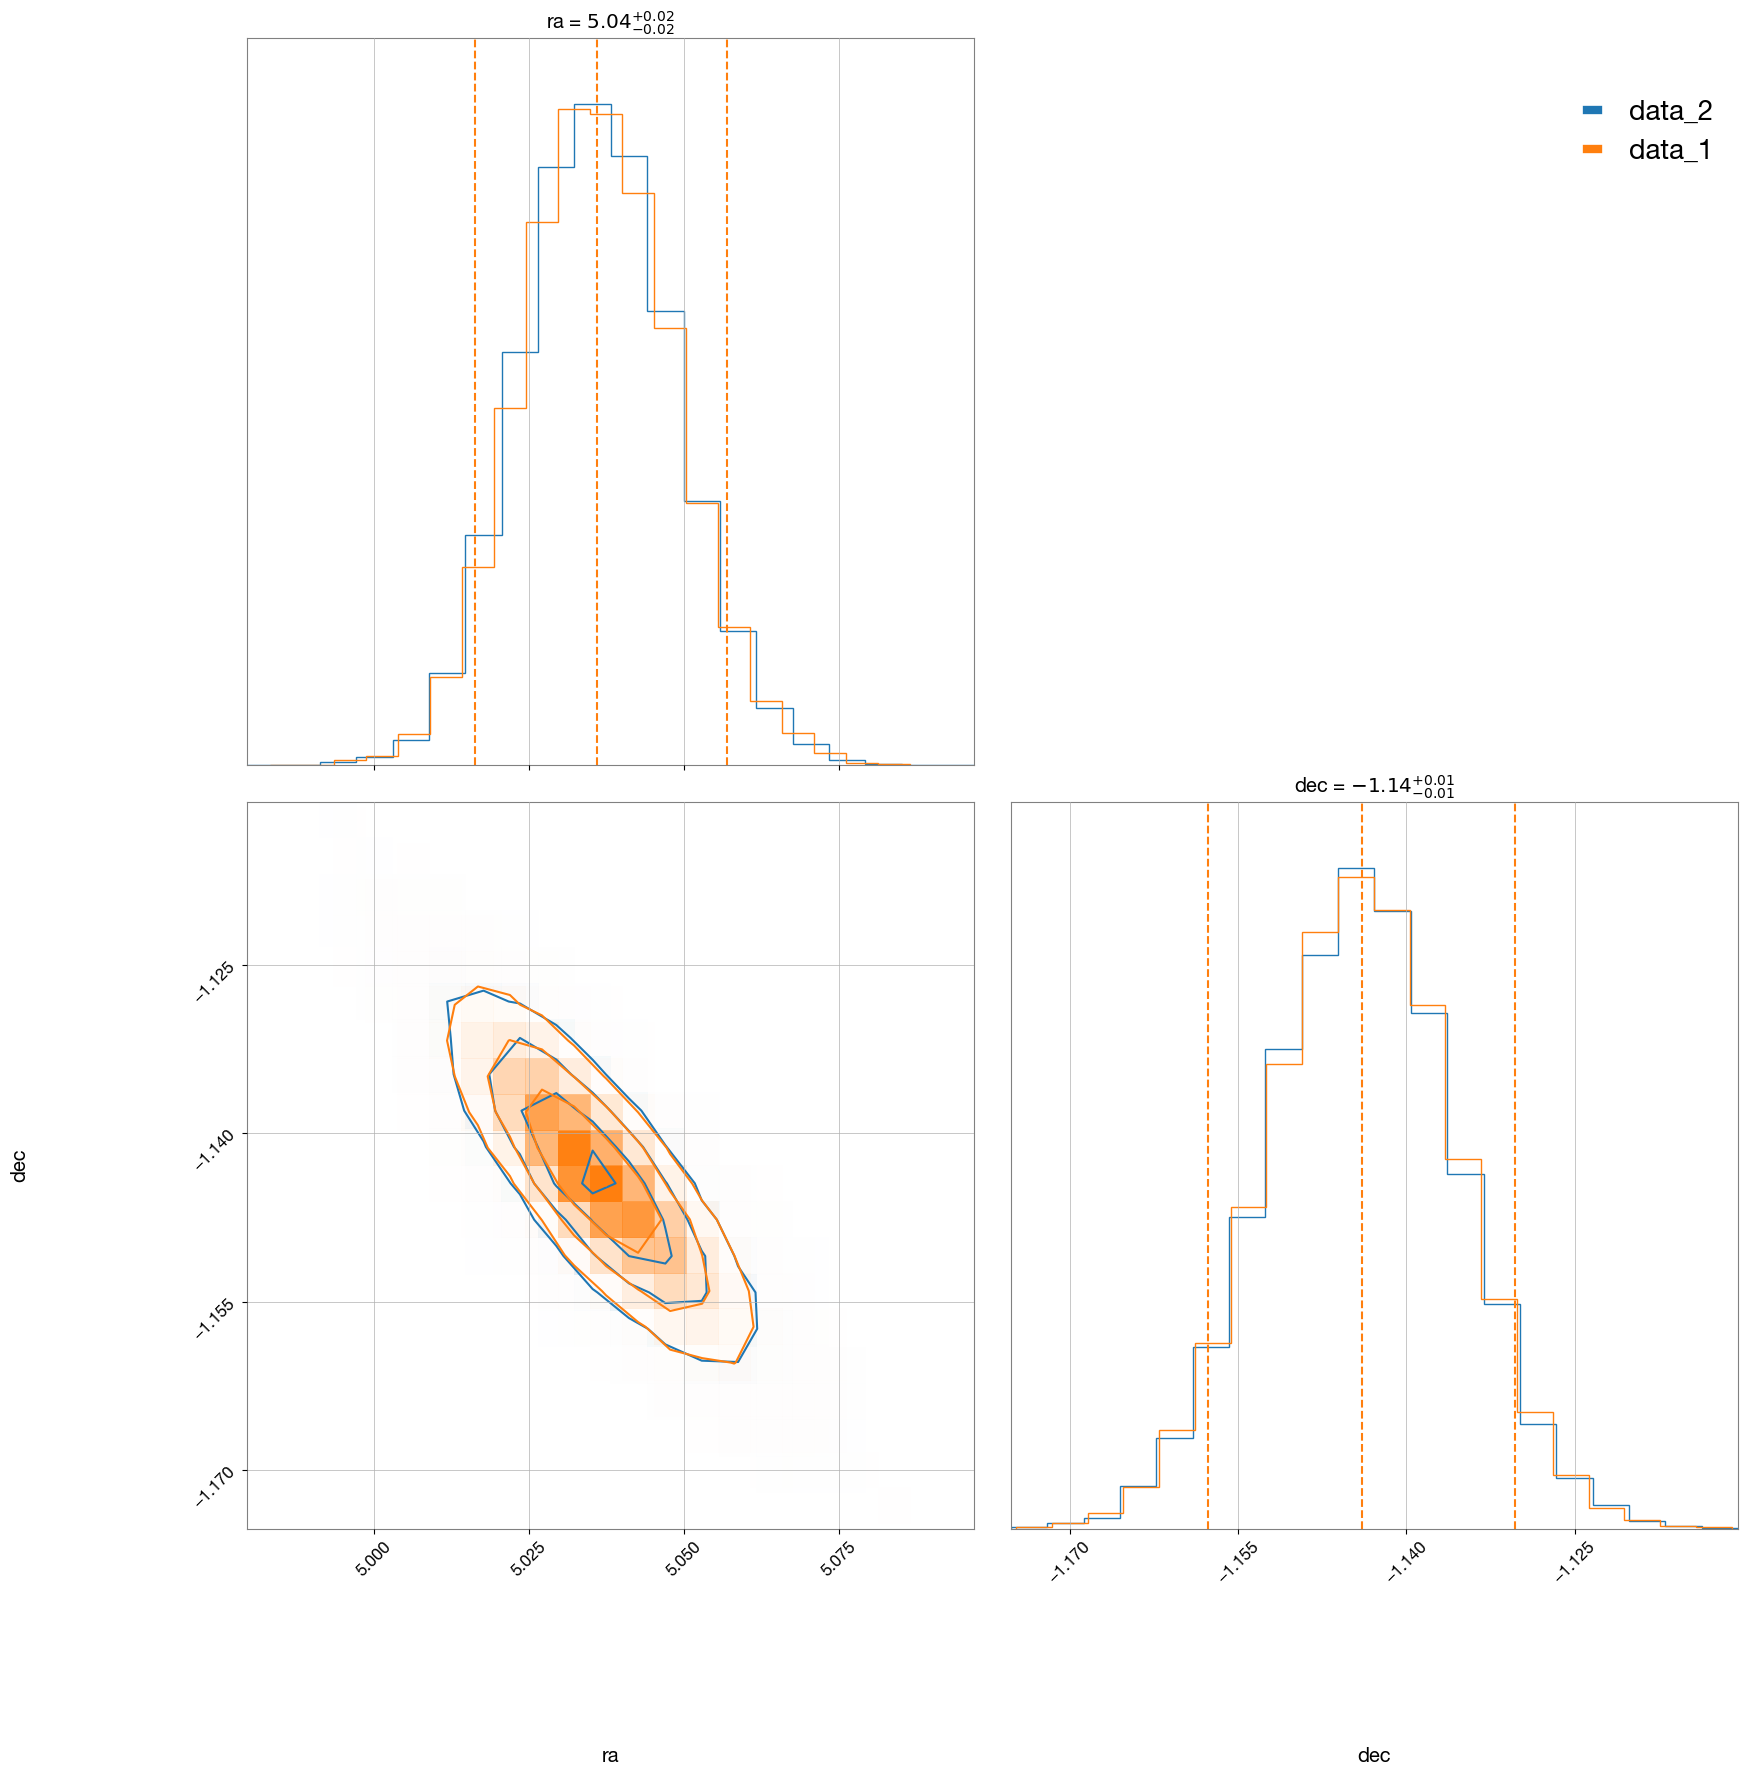

In [58]:
data_new = test.resample(40000)
data_new_ = data_new.copy()

plt.figure(figsize=(5, 5))
pobs.plot(data_dict1=data_new_, data_dict2=data_dict)
plt.show()